<a id='Main'></a>
# Оглавление

[Вводная информация](#Enter)

1. [Первая часть. Исследование данных](#label_first_part) 

2. [Анализ данных](#label_for_analys_data)

3. [Применение линейных моделей](#label_for_learn_linear_model)
    - [LabelEncoder для категориальных признаков](#label_for_learn_linear_model_LabelEncoder)
    - [OneHotEncoder для категориальных признаков](#label_for_learn_linear_model_OneHotEncoder)
    - [StandardScaler для нормализации числовых признаков](#label_for_learn_linear_model_StandardScaler)
    - [Ищем лучшие параметры для LogisticRegression](#label_for_learn_linear_model_LogisticRegression)
    
4. [Применение градиентного бустинга](#label_for_learn_catboost)

5. [Эксперимент с построением стекинга на разных методах](#label_for_learn_stacking)
    - [Что еще стоит попробовать](#label_for_learn_stacking_try)
    - [Чистка данных. Реализация через функцию](#label_for_learn_stacking_cleaning)
    - [Поиск оптимального количества фичей с помощью SelectKBest для точного предсказания LogisticRegression и GradientBoostingClassifier](#label_for_learn_stacking_selection)
    - [Сравнение качества модели при использовании SelectKBest и без в различных вариациях](#label_for_learn_stacking_selection_find_best)
    - [ Выводы для каждой модели](#label_for_learn_stacking_selection_find_best_results)
    - Поиск оптимальных гиперпараметров:
        - [Поиск лучших параметров для LogisticRegression](#label_for_learn_stacking_LogisticRegression)
        - [Поиск лучших параметров для GradientBoostingClassifier](#label_for_learn_stacking_GradientBoostingClassifier)
        - [Поиск лучших параметров для MLPClassifier](#label_for_learn_stacking_MLPClassifier)
        - [Поиск лучших параметров для RandomForestClassifier](#label_for_learn_stacking_RandomForestClassifier)
        - [Поиск лучших параметров для XGBClassifier](#label_for_learn_stacking_XGBClassifier)
        - [Поиск лучших параметров для LGBMClassifier](#label_for_learn_stacking_LGBMClassifier)
        - [Поиск лучших значений для CatBoostClassifier](#label_for_learn_stacking_CatBoostClassifier)
    - [Использование стекинга для моделей с лучшими параметрами для моделей из Sklearn](#label_for_learn_stacking_sklearn)
        - [Использование стекинга для моделей с лучшими параметрами c итоговым методом LogisticRegression](#label_for_learn_stacking_sklearn_LogisticRegression)
        - [Использование стекинга для моделей с лучшими параметрами c итоговым методом NuSVC](#label_for_learn_stacking_sklearn_NuSVC)
    - [Использование стекинга для моделей с лучшими параметрами для моделей из XGBClassifier, CatBoostClassifier, lightgbm](#label_for_learn_stacking_libraries)
        - [Использование стекинга для моделей с лучшими параметрами c итоговым методом LogisticRegression](#label_for_learn_stacking_libraries_LogisticRegression)
        - [Использование стекинга для моделей с лучшими параметрами c итоговым методом NuSVC](#label_for_learn_stacking_libraries_NuSVC)
        
        
        



<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

<a id='Enter'></a>

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

[Перейти к "Оглавлению"](#Main)

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

<a id='label_first_part'></a>
# Первая часть. Исследование
[Перейти к "Оглавлению"](#Main)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# data = pd.read_csv('/content/drive/My Drive/DeepLearningSchool/8.Algorithm_composition/train.csv')
# print(f"Количество строк {data.shape[0]}, количество признаков {data.shape[1]}")
# data.head()

data = pd.read_csv(r'C:\Users\user\PycharmProjects\DeepLearningSchool\8.Algorithm_composition\train.csv')
print(f"Количество строк {data.shape[0]}, количество признаков {data.shape[1]}")
data.head(7)

Количество строк 5282, количество признаков 20


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0


In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
# Общая информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [6]:
# Смотрим None в данных
print(data.isna().any())
# Если бы были пропуски, то вывели бы сумму таких значений
data.isna().sum()

ClientPeriod                False
MonthlySpending             False
TotalSpent                  False
Sex                         False
IsSeniorCitizen             False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers     False
HasInternetService          False
HasOnlineSecurityService    False
HasOnlineBackup             False
HasDeviceProtection         False
HasTechSupportAccess        False
HasOnlineTV                 False
HasMovieSubscription        False
HasContractPhone            False
IsBillingPaperless          False
PaymentMethod               False
Churn                       False
dtype: bool


ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [7]:
# Смотрим пропуски в данных
print(data.isnull().any())
# Если бы были пропуски, то вывели бы сумму таких значений
data.isna().sum()

ClientPeriod                False
MonthlySpending             False
TotalSpent                  False
Sex                         False
IsSeniorCitizen             False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers     False
HasInternetService          False
HasOnlineSecurityService    False
HasOnlineBackup             False
HasDeviceProtection         False
HasTechSupportAccess        False
HasOnlineTV                 False
HasMovieSubscription        False
HasContractPhone            False
IsBillingPaperless          False
PaymentMethod               False
Churn                       False
dtype: bool


ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

<a id='label_for_analys_data'></a>

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

[Перейти к "Оглавлению"](#Main)

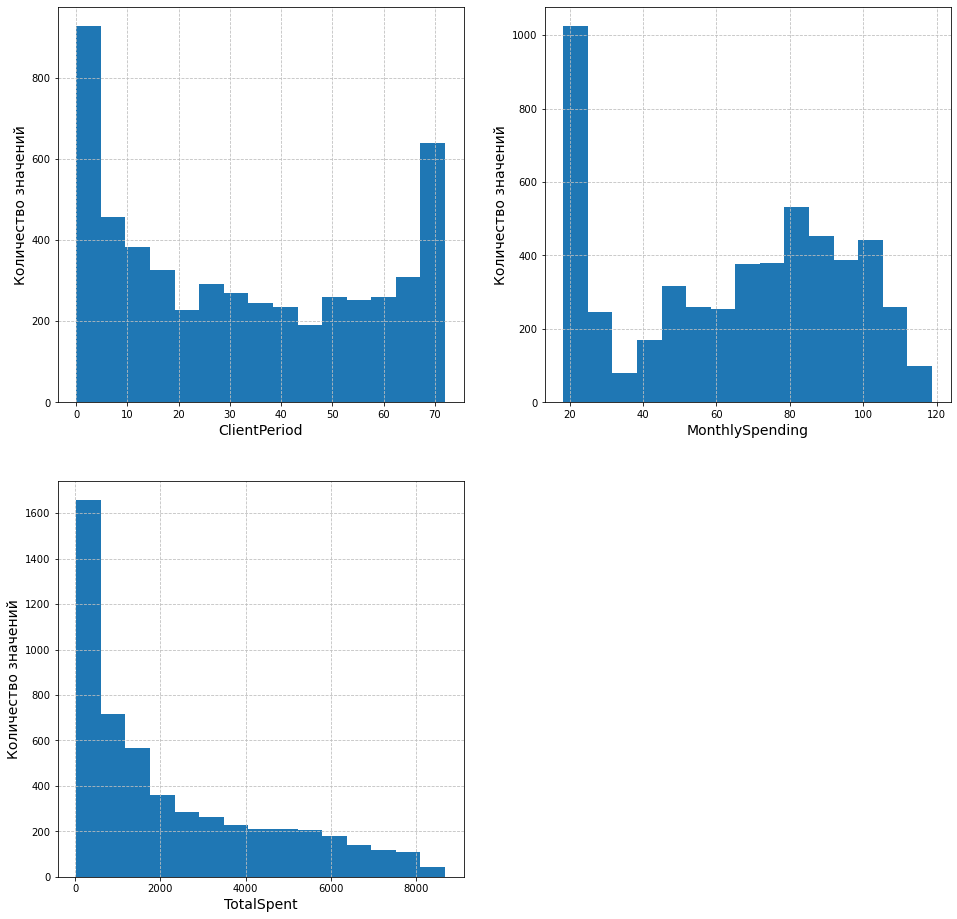

In [8]:
# YOUR CODE
# Задание 1. Смотрим на числовые признаки
import matplotlib.pyplot as plt
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

data['TotalSpent'] = data['TotalSpent'].replace(' ', '0')
data['TotalSpent'] = data['TotalSpent'].astype(float)
data['TotalSpent'] = data['TotalSpent'].replace(0, data['TotalSpent'].mean())

plt.figure(figsize = (16, 16))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    plt.grid(True, linestyle='--', color='0.75')
    plt.hist(data[num_cols[i]], 15)
    plt.xlabel(f'{num_cols[i]}', size = '14')
    plt.ylabel('Количество значений', size = '14')
plt.show()

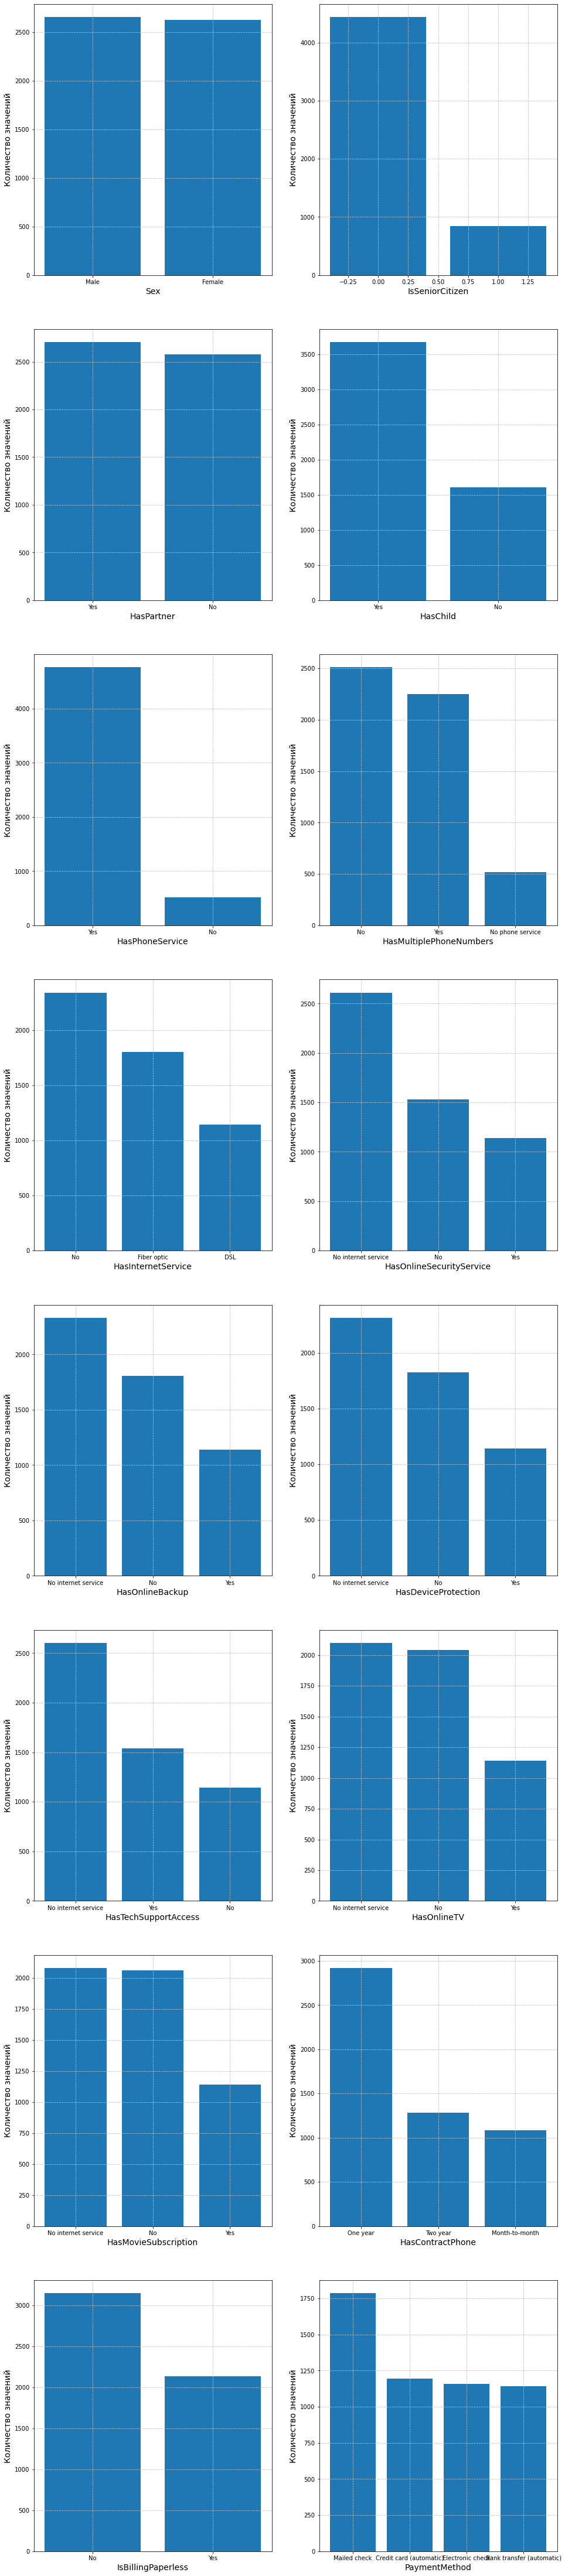

In [9]:
# YOUR CODE
# Задание 1. Смотрим на категориальные признаки
import matplotlib.pyplot as plt
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

plt.figure(figsize = (16, 80))

for i in range(len(cat_cols)):
    plt.subplot(8,2,i+1)
    plt.grid(True, linestyle='--', color='0.75')
    plt.bar(data[cat_cols[i]].unique(), data[cat_cols[i]].value_counts())
    plt.xlabel(f'{cat_cols[i]}', size = '14')
    plt.ylabel('Количество значений', size = '14')
plt.show()

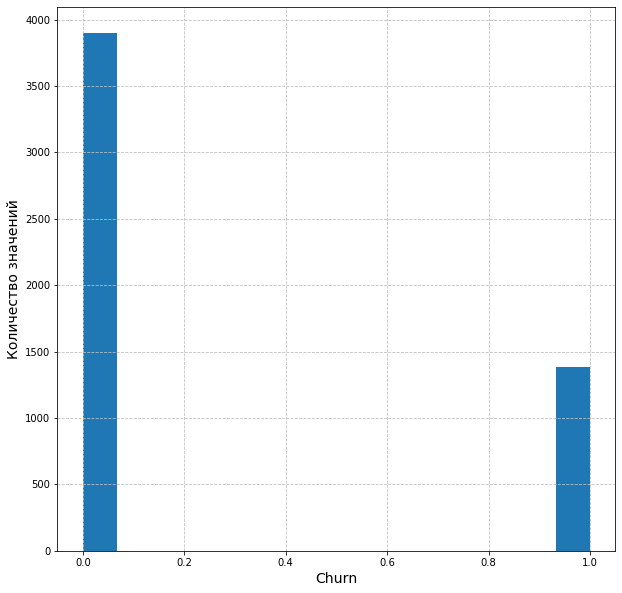

In [10]:
# Задание 2
# Классы не сбалансированны
import matplotlib.pyplot as plt

target_col = 'Churn'
plt.figure(figsize = (10, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.hist(data[target_col], 15)
plt.xlabel(f'{target_col}', size = '14')
plt.ylabel('Количество значений', size = '14')
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [10]:
# YOUR CODE
# Смотрим корреляции
import matplotlib.pyplot as plt


corr = data[feature_cols].corr()

for i in corr:
    print(i)
    print(i, sum(corr[i])-1)

corr.style.background_gradient(cmap='coolwarm')

ClientPeriod
ClientPeriod 1.0860815984281853
MonthlySpending
MonthlySpending 1.1163815573048828
TotalSpent
TotalSpent 1.5705913890548322
IsSeniorCitizen
IsSeniorCitizen 0.32099011152814927


,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen
ClientPeriod,1.000000,0.249414,0.825107,0.011561
MonthlySpending,0.249414,1.000000,0.651511,0.215456
TotalSpent,0.825107,0.651511,1.000000,0.093973
IsSeniorCitizen,0.011561,0.215456,0.093973,1.000000


<a id='label_for_learn_linear_model'></a>

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

[Перейти к "Оглавлению"](#Main)

In [11]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [12]:
# YOUR CODE
features_labels = []

<a id='label_for_learn_linear_model_LabelEncoder'></a>

### LabelEncoder для категориальных признаков

[Перейти к "Оглавлению"](#Main)

In [13]:
le = LabelEncoder()
for s in cat_cols:
    le.fit(data[s])
    data[s+'_le'] = le.transform(data[s])
    features_labels.append(s+'_le')

print(data.shape)
data.head()

(5282, 36)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,...,HasInternetService_le,HasOnlineSecurityService_le,HasOnlineBackup_le,HasDeviceProtection_le,HasTechSupportAccess_le,HasOnlineTV_le,HasMovieSubscription_le,HasContractPhone_le,IsBillingPaperless_le,PaymentMethod_le
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,...,2,1,1,1,1,1,1,1,0,3
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,...,2,1,1,1,1,1,1,2,0,1
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,...,1,0,0,0,2,0,0,0,1,2
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,...,1,0,0,2,0,0,0,0,0,3
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,...,1,2,2,2,2,2,2,2,0,1


<a id='label_for_learn_linear_model_OneHotEncoder'></a>

### OneHotEncoder для категориальных признаков

[Перейти к "Оглавлению"](#Main)

In [14]:
ohe = OneHotEncoder(handle_unknown='ignore')
for s in cat_cols:
    new_ohe_features = ohe.fit_transform(data[s].values.reshape(-1, 1)).toarray()
    tmp = pd.DataFrame(new_ohe_features, columns=[s+'='+str(i) for i in range(new_ohe_features.shape[1])])
    data = pd.concat([data, tmp], axis=1)
    data.drop([s], axis=1, inplace=True)
    [features_labels.append(s+'='+str(i)) for i in range(new_ohe_features.shape[1])]
    

print(data.shape)
data.head()

(5282, 63)


,ClientPeriod,MonthlySpending,TotalSpent,Churn,Sex_le,IsSeniorCitizen_le,HasPartner_le,HasChild_le,HasPhoneService_le,HasMultiplePhoneNumbers_le,...,HasMovieSubscription=2,HasContractPhone=0,HasContractPhone=1,HasContractPhone=2,IsBillingPaperless=0,IsBillingPaperless=1,PaymentMethod=0,PaymentMethod=1,PaymentMethod=2,PaymentMethod=3
0,55,19.50,1026.35,0,1,0,1,1,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,72,25.85,1872.20,0,1,0,1,0,1,2,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,75.90,75.90,1,1,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,32,79.30,2570.00,0,0,1,1,0,1,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60,115.25,6758.45,0,0,0,1,1,1,2,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


<a id='label_for_learn_linear_model_StandardScaler'></a>

### Нормализация числовых признаков

[Перейти к "Оглавлению"](#Main)

In [15]:
scaler = StandardScaler()
for i in num_cols:
    print(i)
    data[i+'_ss'] = scaler.fit_transform(data[i].values.reshape(-1, 1))
    features_labels.append(i+'_ss') 
    data.drop([i], axis=1, inplace=True)

print(data.shape)
data.head()

ClientPeriod
MonthlySpending
TotalSpent
(5282, 63)


,Churn,Sex_le,IsSeniorCitizen_le,HasPartner_le,HasChild_le,HasPhoneService_le,HasMultiplePhoneNumbers_le,HasInternetService_le,HasOnlineSecurityService_le,HasOnlineBackup_le,...,HasContractPhone=2,IsBillingPaperless=0,IsBillingPaperless=1,PaymentMethod=0,PaymentMethod=1,PaymentMethod=2,PaymentMethod=3,ClientPeriod_ss,MonthlySpending_ss,TotalSpent_ss
0,0,1,0,1,1,1,0,2,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.920767,-1.505447,-0.558054
1,0,1,0,1,0,1,2,2,1,1,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.613288,-1.294998,-0.184918
2,1,1,0,0,0,1,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.279005,0.363737,-0.977334
3,0,0,1,1,0,1,2,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.016173,0.476418,0.122908
4,0,0,0,1,1,1,2,1,2,2,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.124450,1.667856,1.970592


<a id='label_for_learn_linear_model_LogisticRegression'></a>

### Ищем лучшие параметры для LogisticRegression

[Перейти к "Оглавлению"](#Main)

In [16]:
import time

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

t = time.time()
parameters = {
    'penalty': ('elasticnet', ),
    'C': (100, 10, 1, 0.1, 0.01, 0.001),
    'class_weight': ('balanced', None),
    'solver': ('saga',),
    'n_jobs': (-1,),
    'l1_ratio': (0.1, 0.3, 0.5, 0.9)
}

lr_clf =  LogisticRegression()
gs_lr_clf = GridSearchCV(lr_clf, parameters, cv=3, scoring='roc_auc')

X_train, X_test, y_train, y_test = train_test_split(
    data[features_labels], data[target_col], stratify=data[target_col], random_state=42, test_size=0.2
)
gs_lr_clf.fit(X_train, y_train)

# End estimate. Writing some info
print(f'How long: {"%.2f" % (time.time()-t)}, s')
print('LogisticRegression - best estimator: ', gs_lr_clf.best_estimator_)
print('LogisticRegression - best score: ', gs_lr_clf.best_score_)
print("LogisticRegression - best predict: ", roc_auc_score(y_test, gs_lr_clf.predict(X_test)))

How long: 47.52, s
LogisticRegression - best estimator:  LogisticRegression(C=10, l1_ratio=0.1, n_jobs=-1, penalty='elasticnet',
                   solver='saga')
LogisticRegression - best score:  0.8404984682404634
LogisticRegression - best predict:  0.7140609090067574


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

LogisticRegression - best predict:  0.7140609090067574

LogisticRegression - best estimator:  LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.1, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

<a id='label_for_learn_catboost'></a>

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

[Перейти к "Оглавлению"](#Main)

In [18]:
!pip install catboost

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [20]:
from catboost import CatBoostClassifier


cbc_clf = CatBoostClassifier(iterations=400,
                       depth=4,
                       learning_rate=0.05,
                       loss_function='Logloss',
                       verbose=False,
                       random_seed = 4,
                       l2_leaf_reg = 40,
                       eval_metric='AUC'
                       )

# parametrs_cbc = {
#     'iterations': [50, 100, 150, 200],
#     "learning_rate": [0.01, 0.05, 0.1, 0.5],
#     'min_data_in_leaf': [3, 6, 9, 12],
#     'depth': [2, 3, 4, 5, 6],
#     'l2_leaf_reg': [0, 0.01, 0.05, 0.1, 0.5]    
# }

parametrs_cbc = {
    'iterations': [100, 150, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    'min_data_in_leaf': [1, 2, 3],
    'depth': [2, 3, 4],
    'l2_leaf_reg': [0, 0.01, 0.05, 0.1, 0.5]    
}

cbc_grid = GridSearchCV(cbc_clf, parametrs_cbc, cv=5, verbose=4, scoring='roc_auc', refit=True, n_jobs=-1)
cbc_grid.fit(X_train, y_train)

# End estimate. Writing some info
print(f'How long: {"%.2f" % (time.time()-t)}, s')
print('CatBoostClassifier - best estimator: ', cbc_grid.best_estimator_.get_params())
print('CatBoostClassifier - best score: ', cbc_grid.best_score_)
print("CatBoostClassifier - best predict: ", roc_auc_score(y_test, cbc_grid.predict(X_test)))

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 1177 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed:  3.0min finished


How long: 612.16, s
CatBoostClassifier - best estimator:  {'iterations': 100, 'learning_rate': 0.1, 'depth': 2, 'l2_leaf_reg': 0.5, 'loss_function': 'Logloss', 'random_seed': 4, 'verbose': False, 'eval_metric': 'AUC', 'min_data_in_leaf': 1}
CatBoostClassifier - best score:  0.8468480901363865
CatBoostClassifier - best predict:  0.701138572618717


<a id='label_for_learn_stacking'></a>

# Эксперимент с построением стекинга на разных методах

[Перейти к "Оглавлению"](#Main)

<a id='label_for_learn_stacking_try'></a>

## Что еще стоит попробовать
- использовать голосование
- разбить выборку на 2 части и на каждой подвыборке провести обучение алгоритмов
- использовать sklearn.multiclass.OneVsRestClassifier
- получше почистить данные
- посмотреть на ошибки в определении классов и на сами фичи
- зафиксировать random_state, тк от него зависит качество модели
- использовать sklearn.preprocessing.PowerTransformer
- использовать sklearn.preprocessing.Normalizer
- использовать sklearn.preprocessing.SplineTransformer
- попробовать Classification with Vowpal Wabbit
- попробовать другой метаалгоритм
- метаалгоритм в стекинге лучше обучать на другой подвыборке (!)
- Заменить 0 и 1 на вероятности каждого значения (?)
- признаки с бинарными значениями образуют 3 новых признака, которые плохо вляют на оценку. Стоит оставить только 1 признак???


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

[Перейти к "Оглавлению"](#Main)

In [ ]:
################################################################################################################
from tqdm import tqdm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

answer = []

for i in tqdm(range(1, 20)):
    clf = AdaBoostClassifier(base_estimator=gs_lr_clf.best_estimator_, n_estimators=i, random_state=0)
    clf.fit(X_train, y_train)
    answer.append(roc_auc_score(y_test, clf.predict(X_test)))
    
print(answer)
################################################################################################################


################################################################################################################
from tqdm import tqdm
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

answer = []
for i in tqdm(range(1, 20)):
    clf = BaggingClassifier(base_estimator=gs_lr_clf.best_estimator_, n_estimators=i, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    answer.append(roc_auc_score(y_test, clf.predict(X_test)))
    
print(max(answer))
################################################################################################################


################################################################################################################
from tqdm import tqdm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

answer = []
for i in tqdm(range(1, 20)):
    clf = ExtraTreesClassifier(n_estimators=i*10, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    answer.append(roc_auc_score(y_test, clf.predict(X_test)))
    
print(max(answer))
################################################################################################################

<a id='label_for_learn_stacking_cleaning'></a>

## Чистка данных. Реализация через функцию
### Реализация pipeline в следующий раз

[Перейти к "Оглавлению"](#Main)

In [21]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel



def upload_and_prepare_data(where_data='computer', best=True):
    """
    Вся очистка здесь для удобства использования
    """
    
    # Числовые признаки
    num_cols = [
        'ClientPeriod',
        'MonthlySpending',
        'TotalSpent'
    ]

    # Категориальные признаки
    cat_cols = [
        'Sex',
        'IsSeniorCitizen',
        'HasPartner',
        'HasChild',
        'HasPhoneService',
        'HasMultiplePhoneNumbers',
        'HasInternetService',
        'HasOnlineSecurityService',
        'HasOnlineBackup',
        'HasDeviceProtection',
        'HasTechSupportAccess',
        'HasOnlineTV',
        'HasMovieSubscription',
        'HasContractPhone',
        'IsBillingPaperless',
        'PaymentMethod'
    ]

    
    feature_cols = num_cols + cat_cols
    target_col = 'Churn'
    features_labels = []
    
    if where_data == 'computer':
        data = pd.read_csv(r'C:\Users\user\PycharmProjects\DeepLearningSchool\8.Algorithm_composition\train.csv')
        data_predict = pd.read_csv(r'C:\Users\user\PycharmProjects\DeepLearningSchool\8.Algorithm_composition\test.csv')
    elif where_data == 'googleDisc':
        from google.colab import drive
        drive.mount('/content/drive')
        data = pd.read_csv('/content/drive/My Drive/DeepLearningSchool/8.Algorithm_composition/hw/train.csv')
        data_predict = pd.read_csv('/content/drive/My Drive/DeepLearningSchool/8.Algorithm_composition/hw/test.csv')
    print("-"*70)
    print(f"Количество строк {data.shape[0]} и количество признаков {data.shape[1]} для обучающей+валидационной выборки")
    print(f"Количество строк {data_predict.shape[0]} и количество признаков {data_predict.shape[1]} для предсказаний")
    print("-"*70)
    
    # Чтение данных для обучения модели
    y = data['Churn']
    data.drop(['Churn'], inplace=True, axis=True)
    data['TotalSpent'] = data['TotalSpent'].replace(' ', '0')
    data['TotalSpent'] = data['TotalSpent'].astype(float)
    data['TotalSpent'] = data['TotalSpent'].replace(0, data['TotalSpent'].mean())

    # Чтение данных для предсказания
    data_predict['TotalSpent'] = data_predict['TotalSpent'].replace(' ', '0')
    data_predict['TotalSpent'] = data_predict['TotalSpent'].astype(float)
    data_predict['TotalSpent'] = data_predict['TotalSpent'].replace(0, data['TotalSpent'].mean())
    X_predict = data_predict

    #LabelEncoder для категориальных признаков
    le = LabelEncoder()
    for s in cat_cols:
        le.fit(data[s])
        data[s+'_le'] = le.transform(data[s])
        X_predict[s+'_le'] = le.transform(X_predict[s])
        features_labels.append(s+'_le')

    # OneHotEncoder для категориальных признаков
    ohe = OneHotEncoder(handle_unknown='ignore')
    for s in cat_cols:
        ohe.fit(data[s].values.reshape(-1, 1))
        new_ohe_features = ohe.transform(X_predict[s].values.reshape(-1, 1)).toarray()
        tmp = pd.DataFrame(new_ohe_features, 
                           columns=[s+'='+str(i) for i in range(new_ohe_features.shape[1])])
        X_predict = pd.concat([X_predict, tmp], axis=1)
        X_predict.drop([s], axis=1, inplace=True)
        new_ohe_features = ohe.transform(data[s].values.reshape(-1, 1)).toarray()
        tmp = pd.DataFrame(new_ohe_features, 
                           columns=[s+'='+str(i) for i in range(new_ohe_features.shape[1])])
        data = pd.concat([data, tmp], axis=1)
        data.drop([s], axis=1, inplace=True)
        [features_labels.append(s+'='+str(i)) for i in range(new_ohe_features.shape[1])]

    # Нормализация числовых признаков
    scaler = StandardScaler()
    for i in num_cols:
        scaler.fit(data[i].values.reshape(-1, 1))
        X_predict[i+'_ss'] = scaler.transform(X_predict[i].values.reshape(-1, 1))
        X_predict.drop([i], axis=1, inplace=True)
        data[i+'_ss'] = scaler.transform(data[i].values.reshape(-1, 1))
        data.drop([i], axis=1, inplace=True)
        features_labels.append(i+'_ss') 

    # Разбивание выборки для обучения на тестовую и валидационную
    X_train, X_valid, y_train, y_valid = train_test_split(
        data, y, stratify=y, random_state=42, test_size=0.2
    )
    
    # Нормировка данных по размаху
    transformer = MaxAbsScaler().fit(X_train)
    X_train = pd.DataFrame(transformer.transform(X_train), columns=features_labels)
    X_valid = pd.DataFrame(transformer.transform(X_valid), columns=features_labels)
    X_predict = pd.DataFrame(transformer.transform(X_predict), columns=features_labels)
    
    # Добавление новых признаков
    # Здесь появляются NaN. Проверить в чем дело
    new_names = ['ClientPeriod_ss', 'MonthlySpending_ss', 'TotalSpent_ss']
    pf = PolynomialFeatures(interaction_only=True, degree=2).fit(X_train[(new_names)])
    X_train_pf = pf.transform(X_train[(new_names)])
    X_valid_pf = pf.transform(X_valid[(new_names)])
    X_predict_pf = pf.transform(X_predict[(new_names)])
    new_names_pf = [f'new_names_{i}' for i in range(X_train_pf.shape[1])]
    
    X_train_pf = pd.DataFrame(X_train_pf, columns=new_names_pf)
    X_valid_pf = pd.DataFrame(X_valid_pf, columns=new_names_pf)
    X_predict_pf = pd.DataFrame(X_predict_pf, columns=new_names_pf)
    
    X_train = pd.concat([X_train, X_train_pf], axis=1)
    X_valid = pd.concat([X_valid, X_valid_pf], axis=1)
    X_predict = pd.concat([X_predict, X_predict_pf], axis=1)
    
    X_train = X_train.drop(['new_names_0'], axis=1)
    X_valid = X_valid.drop(['new_names_0'], axis=1)
    X_predict = X_predict.drop(['new_names_0'], axis=1)
    
    if best:
        selecter = SelectKBest(f_classif, k=48).fit(X_train, y_train)
        X_train = selecter.transform(X_train)
        X_valid = selecter.transform(X_valid)
        X_predict = selecter.transform(X_predict)
    
    print("-"*70)
    print(f"Количество строк {X_train.shape[0]} и количество признаков {X_train.shape[1]} для тестовой выборки")
    print(f"Количество строк {X_valid.shape[0]} и количество признаков {X_valid.shape[1]} для валидационной выборки")
    print(f"Количество строк {X_predict.shape[0]} и количество признаков {X_predict.shape[1]} для предсказаний")
    print("-"*70)
    
    return X_train, y_train, X_valid, y_valid, X_predict

<a id='label_for_learn_stacking_selection'></a>

### Поиск оптимального количества фичей с помощью SelectKBest для точного предсказания LogisticRegression и GradientBoostingClassifier

[Перейти к "Оглавлению"](#Main)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score


def transformer_selecter(num_cols, data_train, value_train, data_valid):
    """
    Отбор признаков
    """
    X_train_tr_sl = data_train.copy()
    y_train_tr_sl = value_train.copy()
    X_valid_tr_sl = data_valid.copy()
    selecter = SelectKBest(f_classif, k=num_cols).fit(X_train_tr_sl, y_train_tr_sl)
    return selecter.transform(X_train_tr_sl), selecter.transform(X_valid_tr_sl)
    
    
def learn_logreg(data_train, value_train, data_valid, value_valid):
    """
    Обучение LogisticRegression
    SelectFromModel - 0.8535 - 62
    """

    X_train_lr = data_train.copy()
    y_train_lr = value_train.copy()
    X_valid_lr = data_valid.copy()
    y_valid_lr = value_valid.copy()
    
    selector = SelectFromModel(estimator=LogisticRegression(solver='saga', random_state=57)).fit(X_train_lr, y_train_lr)
    X_train_lr = selector.transform(X_train_lr)
    X_valid_lr = selector.transform(X_valid_lr)

    parameters_lr= {
        'penalty': ['l1', 'l2', 'elasticnet'],
        'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 20],
        'class_weight': ['balanced', None],
        'max_iter': [50000],
        'random_state': [57],
        'solver': ['saga']
    }
    clf_lr = LogisticRegression()
    lr_grid = GridSearchCV(clf_lr, parameters_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
    lr_grid.fit(X_train_lr, y_train_lr)
    return roc_auc_score(y_valid_lr, lr_grid.best_estimator_.predict_proba(X_valid_lr)[:, 1])


def learn_rfc(data_train, value_train, data_valid, value_valid):
    """
    Обучение GradientBoostingClassifier
    SelectFromModel - 0.8520 - 40
    """
  
    X_train_rfc = data_train.copy()
    y_train_rfc = value_train.copy()
    X_valid_rfc = data_valid.copy()
    y_valid_rfc = value_valid.copy()

    selector = SelectFromModel(
        estimator=GradientBoostingClassifier(loss='exponential', criterion='friedman_mse', random_state=57)
    ).fit(X_train_rfc, y_train_rfc)
    X_train_rfc = selector.transform(X_train_rfc)
    X_valid_rfc = selector.transform(X_valid_rfc)

    parameters_gbc = {
            'learning_rate': [0.05],
            'n_estimators': [150, 200, 250, 300],
            'max_depth': [1, 2, 5],
            'random_state': [57]
            }

    clf_gbc = GradientBoostingClassifier()
    gbc_grid = GridSearchCV(clf_gbc, parameters_gbc, cv=5, verbose=1, scoring='roc_auc', refit=True, n_jobs=-1)
    gbc_grid.fit(X_train_rfc, y_train_rfc)
    return roc_auc_score(y_valid_rfc, gbc_grid.best_estimator_.predict_proba(X_valid_rfc)[:, 1])



logreg = []
rfc = []
num_best = [i for i in range(6, 68, 3)]
X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=False)

# Меняя количество фич находим лучшую модель и считаем качество на валидационной выборке
for i in range(6, 68, 3):
    X_train_trans, X_valid_trans = transformer_selecter(num_cols=i, data_train=X_train, 
                                                        value_train=y_train, data_valid=X_valid)
    logreg.append(
        learn_logreg(data_train=X_train_trans, data_valid=X_valid_trans, value_train=y_train, value_valid=y_valid)
    )
    rfc.append(
        learn_rfc(data_train=X_train_trans, data_valid=X_valid_trans, value_train=y_train, value_valid=y_valid)
    )

----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 4225 и количество признаков 68 для тестовой выборки
Количество строк 1057 и количество признаков 68 для валидационной выборки
Количество строк 1761 и количество признаков 68 для предсказаний
----------------------------------------------------------------------
Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.4s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.4s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.1s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.4s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.6s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.5s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    5.6s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.5s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.9s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.8s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.5s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.8s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.6s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.6s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    9.4s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.6s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.5s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.6s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.4s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.7s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.6s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.7s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.0s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    3.0s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.6s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.6s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.4s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    7.6s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   12.9s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.3s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   12.8s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    8.4s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   13.0s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    5.9s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   14.0s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    6.5s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   13.3s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    9.3s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   12.8s finished


Лучшее значение метрики для GradientBoostingClassifier 0.8520
Достигнуто при количестве фичей 39
Лучшее значение метрики для LogisticRegression 0.8535
Достигнуто при количестве фичей 63


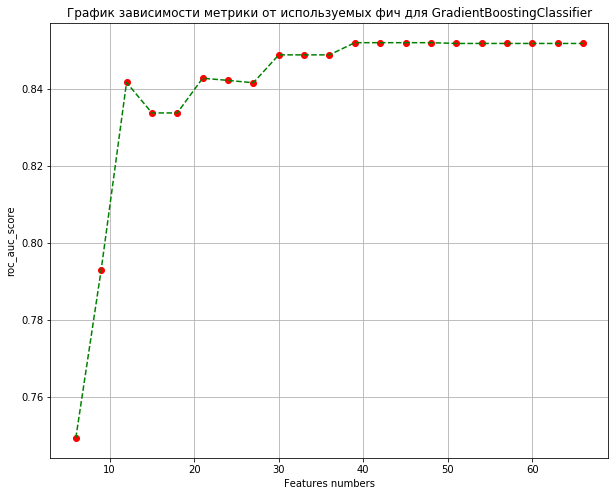

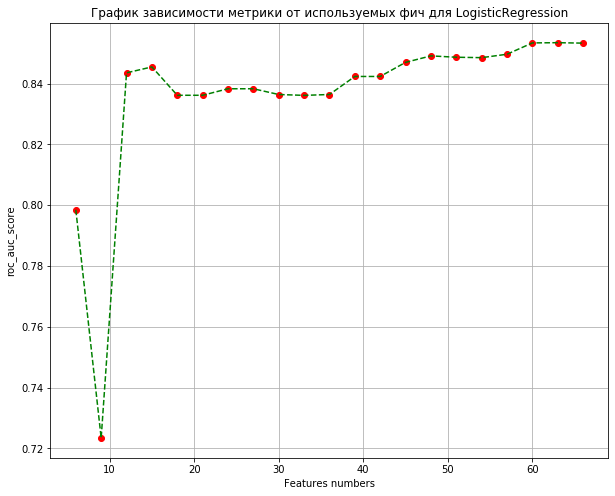

In [31]:
# Строим графики зависимости качества от количества используемых признаков
import matplotlib.pyplot as plt


print(f"Лучшее значение метрики для GradientBoostingClassifier {'%.4f' % max(rfc)}")
print(f"Достигнуто при количестве фичей {num_best[rfc.index(max(rfc))]}")

# plot figure
plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(num_best, rfc, 'ro')
plt.plot(num_best, rfc, 'g--')
plt.title("График зависимости метрики от используемых фич для GradientBoostingClassifier")
plt.xlabel('Features numbers')
plt.ylabel('roc_auc_score')

print(f"Лучшее значение метрики для LogisticRegression {'%.4f' % max(logreg)}")
print(f"Достигнуто при количестве фичей {num_best[logreg.index(max(logreg))]}")

# plot figure
plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(num_best, logreg, 'ro')
plt.plot(num_best, logreg, 'g--')
plt.title("График зависимости метрики от используемых фич для LogisticRegression")
plt.xlabel('Features numbers')
plt.ylabel('roc_auc_score')
plt.show()

<a id='label_for_learn_stacking_selection_find_best'></a>

## Сравнение качества модели при использовании SelectKBest и без в различных вариациях

[Перейти к "Оглавлению"](#Main)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score



###########################################################################################################
# LogisticRegression
X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=False)

X_train_lr = X_train.copy()
y_train_lr = y_train.copy()
X_valid_lr = X_valid.copy()
y_valid_lr = y_valid.copy()
    
selector = SelectFromModel(estimator=LogisticRegression(solver='saga', random_state=57)).fit(X_train_lr, y_train_lr)
X_train_lr = selector.transform(X_train_lr)
X_valid_lr = selector.transform(X_valid_lr)

parameters_lr= {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 20],
    'class_weight': ['balanced', None],
    'max_iter': [10000],
    'random_state': [57],
    'solver': ['saga']
}
clf_lr = LogisticRegression()
lr_grid = GridSearchCV(clf_lr, parameters_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
lr_grid.fit(X_train_lr, y_train_lr)
print("-"*100)
print('LogisticRegression - best estimator: ', lr_grid.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid_lr, lr_grid.best_estimator_.predict_proba(X_valid_lr)[:, 1]))
print("-"*100)
###########################################################################################################


###########################################################################################################
# LogisticRegression
X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=True)

X_train_lr = X_train.copy()
y_train_lr = y_train.copy()
X_valid_lr = X_valid.copy()
y_valid_lr = y_valid.copy()
    
selector = SelectFromModel(estimator=LogisticRegression(solver='saga', random_state=57)).fit(X_train_lr, y_train_lr)
X_train_lr = selector.transform(X_train_lr)
X_valid_lr = selector.transform(X_valid_lr)

print("-"*70)
print(f"Количество строк {X_train_lr.shape[0]} и количество признаков {X_train_lr.shape[1]} для тестовой выборки")
print(f"Количество строк {X_valid_lr.shape[0]} и количество признаков {X_valid_lr.shape[1]} для валидационной выборки")
print("-"*70)

parameters_lr= {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 20],
    'class_weight': ['balanced', None],
    'max_iter': [10000],
    'random_state': [57],
    'solver': ['saga']
}
clf_lr = LogisticRegression()
lr_grid = GridSearchCV(clf_lr, parameters_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
lr_grid.fit(X_train_lr, y_train_lr)
print("-"*100)
print('LogisticRegression - best estimator: ', lr_grid.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid_lr, lr_grid.best_estimator_.predict_proba(X_valid_lr)[:, 1]))
print("-"*100)
###########################################################################################################


###########################################################################################################
# LogisticRegression
X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=False)

X_train_lr = X_train.copy()
y_train_lr = y_train.copy()
X_valid_lr = X_valid.copy()
y_valid_lr = y_valid.copy()

parameters_lr= {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 20],
    'class_weight': ['balanced', None],
    'max_iter': [10000],
    'random_state': [57],
    'solver': ['saga']
}
clf_lr = LogisticRegression()
lr_grid = GridSearchCV(clf_lr, parameters_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
lr_grid.fit(X_train_lr, y_train_lr)
print("-"*100)
print('LogisticRegression - best estimator: ', lr_grid.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid_lr, lr_grid.best_estimator_.predict_proba(X_valid_lr)[:, 1]))
print("-"*100)
###########################################################################################################


###########################################################################################################
# LogisticRegression
X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=True)

X_train_lr = X_train.copy()
y_train_lr = y_train.copy()
X_valid_lr = X_valid.copy()
y_valid_lr = y_valid.copy()

parameters_lr= {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 20],
    'class_weight': ['balanced', None],
    'max_iter': [10000],
    'random_state': [57],
    'solver': ['saga']
}
clf_lr = LogisticRegression()
lr_grid = GridSearchCV(clf_lr, parameters_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
lr_grid.fit(X_train_lr, y_train_lr)
print("-"*100)
print('LogisticRegression - best estimator: ', lr_grid.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid_lr, lr_grid.best_estimator_.predict_proba(X_valid_lr)[:, 1]))
print("-"*100)
###########################################################################################################

----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 4225 и количество признаков 68 для тестовой выборки
Количество строк 1057 и количество признаков 68 для валидационной выборки
Количество строк 1761 и количество признаков 68 для предсказаний
----------------------------------------------------------------------
Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.5s finished


----------------------------------------------------------------------------------------------------
LogisticRegression - best estimator:  LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=57, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
Предсказание класса через лучшие параметры параметры 0.8548389336295473
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
К

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.4s finished


----------------------------------------------------------------------------------------------------
LogisticRegression - best estimator:  LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=57, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
Предсказание класса через лучшие параметры параметры 0.8491090437841341
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
Ко

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   32.0s finished


----------------------------------------------------------------------------------------------------
LogisticRegression - best estimator:  LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=57, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
Предсказание класса через лучшие параметры параметры 0.8566601869850967
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
К

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.1s


----------------------------------------------------------------------------------------------------
LogisticRegression - best estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=57, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
Предсказание класса через лучшие параметры параметры 0.852584930112006
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   21.6s finished


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score


##############################################################################################
# GradientBoostingClassifier
X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=False)

X_train_gbc = X_train.copy()
y_train_gbc = y_train.copy()
X_valid_gbc = X_valid.copy()
y_valid_gbc = y_valid.copy()

selector = SelectFromModel(estimator=GradientBoostingClassifier(loss='exponential', criterion='friedman_mse')).fit(X_train_gbc, y_train_gbc)
X_train_gbc = selector.transform(X_train_gbc)
X_valid_gbc = selector.transform(X_valid_gbc)

# Started parameters
parameters_gbc = {
#         'learning_rate': [0.05, 0.1, 0.5, 0.9],
        'n_estimators': [50, 100, 150, 200, 250, 300],
#         'subsample': [0.1, 0.5, 1, 5],
        'min_samples_leaf': [1, 2, 3],
        'max_depth': [1, 2, 3, 4, 5],
        'max_features': ['sqrt', 'log2', None],
        'random_state': [57]
        }

clf_gbc = GradientBoostingClassifier()
gbc_grid = GridSearchCV(clf_gbc, parameters_gbc, cv=5, verbose=4, scoring='roc_auc', refit=True, n_jobs=-1)
gbc_grid.fit(X_train_gbc, y_train_gbc)

print('GradientBoostingClassifier - best estimator: ', gbc_grid.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid_gbc, gbc_grid.best_estimator_.predict_proba(X_valid_gbc)[:, 1]))
##############################################################################################


##############################################################################################
# GradientBoostingClassifier
X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=True)

X_train_gbc = X_train.copy()
y_train_gbc = y_train.copy()
X_valid_gbc = X_valid.copy()
y_valid_gbc = y_valid.copy()

selector = SelectFromModel(estimator=GradientBoostingClassifier(loss='exponential', criterion='friedman_mse')).fit(X_train_gbc, y_train_gbc)
X_train_gbc = selector.transform(X_train_gbc)
X_valid_gbc = selector.transform(X_valid_gbc)

print("-"*70)
print(f"Количество строк {X_train_gbc.shape[0]} и количество признаков {X_train_gbc.shape[1]} для тестовой выборки")
print(f"Количество строк {X_valid_gbc.shape[0]} и количество признаков {X_valid_gbc.shape[1]} для валидационной выборки")
print("-"*70)

# Started parameters
parameters_gbc = {
#         'learning_rate': [0.05, 0.1, 0.5, 0.9],
        'n_estimators': [50, 100, 150, 200, 250, 300],
#         'subsample': [0.1, 0.5, 1, 5],
        'min_samples_leaf': [1, 2, 3],
        'max_depth': [1, 2, 3, 4, 5],
        'max_features': ['sqrt', 'log2', None],
        'random_state': [57]
        }

clf_gbc = GradientBoostingClassifier()
gbc_grid = GridSearchCV(clf_gbc, parameters_gbc, cv=5, verbose=4, scoring='roc_auc', refit=True, n_jobs=-1)
gbc_grid.fit(X_train_gbc, y_train_gbc)

print('GradientBoostingClassifier - best estimator: ', gbc_grid.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid_gbc, gbc_grid.best_estimator_.predict_proba(X_valid_gbc)[:, 1]))
##############################################################################################


##############################################################################################
# GradientBoostingClassifier
X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=True)

X_train_gbc = X_train.copy()
y_train_gbc = y_train.copy()
X_valid_gbc = X_valid.copy()
y_valid_gbc = y_valid.copy()

# Started parameters
parameters_gbc = {
#         'learning_rate': [0.05, 0.1, 0.5, 0.9],
        'n_estimators': [50, 100, 150, 200, 250, 300],
#         'subsample': [0.1, 0.5, 1, 5],
        'min_samples_leaf': [1, 2, 3],
        'max_depth': [1, 2, 3, 4, 5],
        'max_features': ['sqrt', 'log2', None],
        'random_state': [57]
        }

clf_gbc = GradientBoostingClassifier()
gbc_grid = GridSearchCV(clf_gbc, parameters_gbc, cv=5, verbose=4, scoring='roc_auc', refit=True, n_jobs=-1)
gbc_grid.fit(X_train_gbc, y_train_gbc)

print('GradientBoostingClassifier - best estimator: ', gbc_grid.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid_gbc, gbc_grid.best_estimator_.predict_proba(X_valid_gbc)[:, 1]))
##############################################################################################


##############################################################################################
# GradientBoostingClassifier
X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=False)

X_train_gbc = X_train.copy()
y_train_gbc = y_train.copy()
X_valid_gbc = X_valid.copy()
y_valid_gbc = y_valid.copy()

# Started parameters
parameters_gbc = {
#         'learning_rate': [0.05, 0.1, 0.5, 0.9],
        'n_estimators': [50, 100, 150, 200, 250, 300],
#         'subsample': [0.1, 0.5, 1, 5],
        'min_samples_leaf': [1, 2, 3],
        'max_depth': [1, 2, 3, 4, 5],
        'max_features': ['sqrt', 'log2', None],
        'random_state': [57]
        }

clf_gbc = GradientBoostingClassifier()
gbc_grid = GridSearchCV(clf_gbc, parameters_gbc, cv=5, verbose=4, scoring='roc_auc', refit=True, n_jobs=-1)
gbc_grid.fit(X_train_gbc, y_train_gbc)

print('GradientBoostingClassifier - best estimator: ', gbc_grid.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid_gbc, gbc_grid.best_estimator_.predict_proba(X_valid_gbc)[:, 1]))
##############################################################################################

----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 4225 и количество признаков 68 для тестовой выборки
Количество строк 1057 и количество признаков 68 для валидационной выборки
Количество строк 1761 и количество признаков 68 для предсказаний
----------------------------------------------------------------------
Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 709 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 978 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1297 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  2.3min finished


GradientBoostingClassifier - best estimator:  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=57, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Предсказание класса через лучшие параметры параметры 0.8509164121077478
----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количест

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 709 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 978 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1297 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  2.0min finished


GradientBoostingClassifier - best estimator:  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=57, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Предсказание класса через лучшие параметры параметры 0.8520318430065723
----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количе

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 709 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 978 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1297 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  2.8min finished


GradientBoostingClassifier - best estimator:  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=57, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Предсказание класса через лучшие параметры параметры 0.8549291863371286
----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количе

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 476 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 697 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 966 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1285 tasks      | elapsed:  2.6min


GradientBoostingClassifier - best estimator:  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=57, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Предсказание класса через лучшие параметры параметры 0.8551629177080441


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  3.1min finished


<a id='label_for_learn_stacking_selection_find_best_results'></a>

## Выводы для каждой модели

### Разница в 0.7 % между лучшим и худшим значениями - можно подумать над этим
- Верно для модели LogisticRegression()
- Лучшее значение при upload_and_prepare_data(where_data='computer', best=False) и отсутствует SelectFromModel() для отбора признаков перед самим обучением
- Больше признаков ведет к увеличению времени для обучения с 2.6 с до 20.6 с (довольно существенно)
- Лучшая модель в зависимости от максимального объема данных:
    - объем данных для обучения - 4225х68
    - максимальный объем данных для для валидации - 1057х68
    - качество - 0.8566
    - время обучения - 32.6s
- Худшая модель в зависимости от минимального объема данных:
    - объем данных для обучения - 4225х14
    - объем данных для для валидации - 1057х14
    - качество - 0.8491
    - время обучения - 2.6s


### Разница в 0.3 % между лучшим и худшим значениями - можно подумать над этим
- Верно для модели GradientBoostingClassifier()
- Лучшее значение при upload_and_prepare_data(where_data='computer', best=False) и отсутствует SelectFromModel() для отбора признаков перед самим обучением
- Больше признаков ведет к увеличению времени для обучения с 2.0 минут до 3.1 минуты (примерно на 1/3 выросло время обучения при небольшой потере качества)
- Лучшая модель в зависимости от максимального объема данных:
    - объем данных для обучения - 4225х68
    - максимальный объем данных для для валидации - 1057х68
    - качество - 0.8552
    - время обучения - 3.1min
- Худшая модель в зависимости от минимального объема данных:
    - объем данных для обучения - 4225х13
    - объем данных для для валидации - 1057х13
    - качество - 0.8520
    - время обучения - 2.0min
    
[Перейти к "Оглавлению"](#Main)

<a id='label_for_learn_stacking_LogisticRegression'></a>

## Поиск лучших параметров для LogisticRegression

[Перейти к "Оглавлению"](#Main)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score


###########################################################################################################
# LogisticRegression
X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=False)

X_train_lr = X_train.copy()
y_train_lr = y_train.copy()
X_valid_lr = X_valid.copy()
y_valid_lr = y_valid.copy()

# parameters_lr= {
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 20],
#     'class_weight': ['balanced', None],
#     'max_iter': [10000],
#     'random_state': [57],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# }

parameters_lr= {
    'penalty': ['l1'],
    'C': [0.4],
    'class_weight': [None],
    'max_iter': [10000],
    'random_state': [57],
    'solver': ['liblinear']
}

clf_lr = LogisticRegression()
lr_grid = GridSearchCV(clf_lr, parameters_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
lr_grid.fit(X_train_lr, y_train_lr)
print("-"*100)
print('LogisticRegression - best estimator: ', lr_grid.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid_lr, lr_grid.best_estimator_.predict_proba(X_valid_lr)[:, 1]))
print("-"*100)
###########################################################################################################

----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 4225 и количество признаков 68 для тестовой выборки
Количество строк 1057 и количество признаков 68 для валидационной выборки
Количество строк 1761 и количество признаков 68 для предсказаний
----------------------------------------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
----------------------------------------------------------------------------------------------------
LogisticRegression - best estimator:  LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
             

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


<a id='label_for_learn_stacking_GradientBoostingClassifier'></a>

## Поиск лучших параметров для GradientBoostingClassifier

[Перейти к "Оглавлению"](#Main)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score


##############################################################################################
# GradientBoostingClassifier

X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=False)

X_train_gbc = X_train.copy()
y_train_gbc = y_train.copy()
X_valid_gbc = X_valid.copy()
y_valid_gbc = y_valid.copy()

# Started parameters
# parameters_gbc = {
#         'learning_rate': [0.05, 0.1, 0.5, 0.9],
#         'n_estimators': [50, 100, 150, 200, 250, 300],
#         'subsample': [0.1, 0.5, 1, 5],
#         'min_samples_leaf': [1, 2, 3],
#         'max_depth': [1, 2, 3, 4, 5],
#         'max_features': ['sqrt', 'log2', None],
#         'random_state': [57]
#         }

parameters_gbc = {
        'learning_rate': [0.1],
        'n_estimators': [170],
        'subsample': [1],
        'min_samples_leaf': [2],
        'max_depth': [1],
        'max_features': ['log2'],
        'random_state': [57]
        }

clf_gbc = GradientBoostingClassifier()
gbc_grid = GridSearchCV(clf_gbc, parameters_gbc, cv=5, verbose=4, scoring='roc_auc', refit=True, n_jobs=-1)
gbc_grid.fit(X_train_gbc, y_train_gbc)

print('GradientBoostingClassifier - best estimator: ', gbc_grid.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid_gbc, gbc_grid.best_estimator_.predict_proba(X_valid_gbc)[:, 1]))
##############################################################################################

----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 4225 и количество признаков 68 для тестовой выборки
Количество строк 1057 и количество признаков 68 для валидационной выборки
Количество строк 1761 и количество признаков 68 для предсказаний
----------------------------------------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s


GradientBoostingClassifier - best estimator:  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=170,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=57, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Предсказание класса через лучшие параметры параметры 0.8558293992409515


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


<a id='label_for_learn_stacking_MLPClassifier'></a>

## Поиск лучших параметров для MLPClassifier

[Перейти к "Оглавлению"](#Main)

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score


##############################################################################################
# MLPClassifier

X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=False)

X_train_mlpc = X_train.copy()
y_train_mlpc = y_train.copy()
X_valid_mlpc = X_valid.copy()
y_valid_mlpc = y_valid.copy()

# Started parameters
# parameters_mlpc = {
#     'activation': ['tanh', 'logistic', 'identity', 'relu'],
#     'solver': ['lbfgs', 'sgd', 'adam'],
#     'max_iter': [100, 200, 500, 1000],
#     'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
#     'learning_rate': ['constant', 'invscaling', 'adaptive'],
#     'hidden_layer_sizes': [1, 5, 10, 50, 100],
#     'random_state': [57]
# }

parameters_mlpc = {
    'activation': ['logistic'],
    'solver': ['adam'],
    'max_iter': [200],
    'alpha': [0.006],
    'learning_rate': ['constant'],
    'hidden_layer_sizes': [40],
    'random_state': [57]
}

clf_mlpc = MLPClassifier()
mlpc_grid = GridSearchCV(clf_mlpc, parameters_mlpc, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
mlpc_grid.fit(X_train_mlpc, y_train_mlpc)

print('MLPClassifier - best estimator: ', mlpc_grid.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid_mlpc, mlpc_grid.best_estimator_.predict_proba(X_valid_mlpc)[:, 1]))
##############################################################################################

----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 4225 и количество признаков 68 для тестовой выборки
Количество строк 1057 и количество признаков 68 для валидационной выборки
Количество строк 1761 и количество признаков 68 для предсказаний
----------------------------------------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished


MLPClassifier - best estimator:  MLPClassifier(activation='logistic', alpha=0.006, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=40, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=57, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Предсказание класса через лучшие параметры параметры 0.8561742108673517


<a id='label_for_learn_stacking_RandomForestClassifier'></a>

## Поиск лучших параметров для RandomForestClassifier

[Перейти к "Оглавлению"](#Main)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score


##############################################################################################
# RandomForestClassifier
X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=False)

X_train_rfc = X_train.copy()
y_train_rfc = y_train.copy()
X_valid_rfc = X_valid.copy()
y_valid_rfc = y_valid.copy()

# Start parameters
# parameters_rfc = {
#     'n_estimators': [10, 50, 100, 150, 200, 500],
#     'criterion': ['gini','entropy'],
#     'min_samples_leaf': [1, 5, 10, 15, 20],
#     'max_features': ['sqrt', 'log2'],
#     'max_samples': [5, 10, 15, 20]
# }

parameters_rfc = {
    'n_estimators': [1000],
    'criterion': ['entropy'],
    'min_samples_leaf': [2],
    'max_features': ['sqrt'],
    'max_samples': [200]
}

clf_rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(clf_rfc, parameters_rfc, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
rfc_grid.fit(X_train_rfc, y_train_rfc)

print('RandomForestClassifier - best estimator: ', rfc_grid.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid_rfc, rfc_grid.best_estimator_.predict_proba(X_valid_rfc)[:, 1]))
##############################################################################################

----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 4225 и количество признаков 68 для тестовой выборки
Количество строк 1057 и количество признаков 68 для валидационной выборки
Количество строк 1761 и количество признаков 68 для предсказаний
----------------------------------------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished


RandomForestClassifier - best estimator:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=200,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Предсказание класса через лучшие параметры параметры 0.8564357123021383


<a id='label_for_learn_stacking_XGBClassifier'></a>

## Поиск лучших параметров для XGBClassifier

[Перейти к "Оглавлению"](#Main)

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score


#############################################################################################
# XGBClassifier

X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=False)

X_train_xgbc = X_train.copy()
y_train_xgbc = y_train.copy()
X_valid_xgbc = X_valid.copy()
y_valid_xgbc = y_valid.copy()

# params_xgbc = {
#         'min_child_weight': [1, 2, 4, 5],
#         'gamma': [1, 5, 10],
#         'subsample': [0.1, 0.3, 0.5, 0.7],
#         'colsample_bytree': [0.1, 0.3, 0.5, 0.7],
#         'max_depth': [1, 2, 3, 5],
#         'n_estimators': [100, 300, 500, 700],
#         'eval_metric': ['auc'],
#         'random_state': [57],
#         'seed': [57]
#         }

params_xgbc = {
        'min_child_weight': [4],
        'gamma': [1],
        'subsample': [0.3],
        'colsample_bytree': [0.3],
        'max_depth': [2],
        'n_estimators': [52],
        'eval_metric': ['auc'],
        'random_state': [57],
        'seed': [57]
        }

clf_xgbc = XGBClassifier()
xgbc_grid = GridSearchCV(clf_xgbc, params_xgbc, cv=5, verbose=4, scoring='roc_auc', refit=True, n_jobs=-1)
xgbc_grid.fit(X_train_xgbc, y_train_xgbc)

print('XGBClassifier - best estimator: ', xgbc_grid.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid_xgbc, xgbc_grid.best_estimator_.predict_proba(X_valid_xgbc)[:, 1]))
#############################################################################################

----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 4225 и количество признаков 68 для тестовой выборки
Количество строк 1057 и количество признаков 68 для валидационной выборки
Количество строк 1761 и количество признаков 68 для предсказаний
----------------------------------------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


XGBClassifier - best estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eval_metric='auc',
              gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=None, n_estimators=52, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=57,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=57,
              silent=None, subsample=0.3, verbosity=1)
Предсказание класса через лучшие параметры параметры 0.8567990373044524


<a id='label_for_learn_stacking_LGBMClassifier'></a>

## Поиск лучших параметров для LGBMClassifier

[Перейти к "Оглавлению"](#Main)

In [29]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score


#############################################################################################
# LGBMClassifier

X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=False)

X_train_lgbmc = X_train.copy()
y_train_lgbmc = y_train.copy()
X_valid_lgbmc = X_valid.copy()
y_valid_lgbmc = y_valid.copy()

# parametrs_lgbmc = {
#     'boosting_type': ['dart', 'gbdt', 'goss', 'rf'],
#     'num_leaves': [1, 5, 6, 7, 10],
#    'max_depth': [1, 2, 3, 4, 5, 10],
#    'class_weight': ['balanced', None], 
#    'random_state': [57],
#    'learning_rate': [0.01, 0.05, 0.1, 0.5, 0.9],
#    'n_estimators': [10, 50, 100, 200, 500],
#    'eval_metric': ['auc']
# }

parametrs_lgbmc = {
    'boosting_type': ['dart'],
    'num_leaves': [4],
   'max_depth': [2],
   'class_weight': ['balanced'], 
   'random_state': [57],
   'learning_rate': [0.1],
   'n_estimators': [240],
   'eval_metric': ['auc']
}

clf_lgbmc = lgb.LGBMClassifier()
lgbmc_grid = GridSearchCV(clf_lgbmc, parametrs_lgbmc, cv=5, verbose=4, scoring='roc_auc', refit=True, n_jobs=-1)
lgbmc_grid.fit(X_train_lgbmc, y_train_lgbmc)

print('LGBMClassifier - best estimator: ', lgbmc_grid.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid_lgbmc, lgbmc_grid.best_estimator_.predict_proba(X_valid_lgbmc)[:, 1]))
#############################################################################################

----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 4225 и количество признаков 68 для тестовой выборки
Количество строк 1057 и количество признаков 68 для валидационной выборки
Количество строк 1761 и количество признаков 68 для предсказаний
----------------------------------------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


[LightGBM] [Warning] Unknown parameter: eval_metric
LGBMClassifier - best estimator:  LGBMClassifier(boosting_type='dart', class_weight='balanced',
               colsample_bytree=1.0, eval_metric='auc', importance_type='split',
               learning_rate=0.1, max_depth=2, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=240,
               n_jobs=-1, num_leaves=4, objective=None, random_state=57,
               reg_alpha=0.0, reg_lambda=0.0, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
Предсказание класса через лучшие параметры параметры 0.8528186614829214


<a id='label_for_learn_stacking_CatBoostClassifier'></a>

## Поиск лучших значений для CatBoostClassifier

[Перейти к "Оглавлению"](#Main)

In [30]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score



#############################################################################################
# CatBoostClassifier

X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=False)

X_train_cbc = X_train.copy()
y_train_cbc = y_train.copy()
X_valid_cbc = X_valid.copy()
y_valid_cbc = y_valid.copy()

clf_cbc = CatBoostClassifier(iterations=400,
                       depth=4,
                       learning_rate=0.05,
                       loss_function='Logloss',
                       random_seed = 4,
                       l2_leaf_reg = 40,
                       silent=True,
                       eval_metric='AUC:type=Classic'
                       )

# parametrs_cbc = {
#     'iterations': [10, 50, 100, 150, 200, 500],
#     "learning_rate": [0.01, 0.05, 0.1, 0.5, 0.9],
#     'min_data_in_leaf': [1, 2, 3, 5, 10],
#     'depth': [1, 2, 3, 4, 5],
#     'l2_leaf_reg': [0, 0.001, 0.005, 0.01, 0.05, 0.1]    
# }

parametrs_cbc = {
    'iterations': [150],
    "learning_rate": [0.05],
    'min_data_in_leaf': [1],
    'depth': [2],
    'l2_leaf_reg': [0]    
}

cbc_grid = GridSearchCV(clf_cbc, parametrs_cbc, cv=5, verbose=4, scoring='roc_auc', refit=True, n_jobs=-1)
cbc_grid.fit(X_train_cbc, y_train_cbc)

print('CatBoostClassifier - best estimator: ', cbc_grid.best_estimator_.get_params())
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid_cbc, cbc_grid.best_estimator_.predict_proba(X_valid_cbc)[:, 1]))
#############################################################################################

----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 4225 и количество признаков 68 для тестовой выборки
Количество строк 1057 и количество признаков 68 для валидационной выборки
Количество строк 1761 и количество признаков 68 для предсказаний
----------------------------------------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


CatBoostClassifier - best estimator:  {'iterations': 150, 'learning_rate': 0.05, 'depth': 2, 'l2_leaf_reg': 0, 'loss_function': 'Logloss', 'random_seed': 4, 'silent': True, 'eval_metric': 'AUC:type=Classic', 'min_data_in_leaf': 1}
Предсказание класса через лучшие параметры параметры 0.8570744237711747


<a id='label_for_learn_stacking_sklearn'></a>

# Использование стекинга для моделей с лучшими параметрами для моделей из Sklearn

[Перейти к "Оглавлению"](#Main)

<a id='label_for_learn_stacking_sklearn_LogisticRegression'></a>

## Использование стекинга для моделей с лучшими параметрами c итоговым методом LogisticRegression

[Перейти к "Оглавлению"](#Main)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline


X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=False)

##############################################################################################
# MLPClassifier

X_train_mlpc = X_train.copy()
y_train_mlpc = y_train.copy()

parameters_mlpc = {
    'activation': ['logistic'],
    'solver': ['adam'],
    'max_iter': [200],
    'alpha': [0.006],
    'learning_rate': ['constant'],
    'hidden_layer_sizes': [40],
    'random_state': [57]
}

clf_mlpc = MLPClassifier()
mlpc_grid = GridSearchCV(clf_mlpc, parameters_mlpc, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
mlpc_grid.fit(X_train_mlpc, y_train_mlpc)
##############################################################################################


##############################################################################################
# GaussianNB 

X_train_gnb = X_train.copy()
y_train_gnb = y_train.copy()

clf_gnb = GaussianNB()
clf_gnb.fit(X_train_gnb, y_train_gnb)
##############################################################################################


##############################################################################################
# GradientBoostingClassifier

# pipe_gbc = Pipeline(steps=[
#         ('select', SelectFromModel(estimator=GradientBoostingClassifier(loss='exponential', 
#                                                                         criterion='friedman_mse', 
#                                                                         random_state=57))),
#         ('clf', GradientBoostingClassifier(loss='exponential', 
#                                            criterion='friedman_mse', 
#                                           random_state=57))
# ])

X_train_gbc = X_train.copy()
y_train_gbc = y_train.copy()

clf_gbc = GradientBoostingClassifier()

parameters_gbc = {
        'learning_rate': [0.1],
        'n_estimators': [170],
        'subsample': [1],
        'min_samples_leaf': [2],
        'max_depth': [1],
        'max_features': ['log2'],
        'random_state': [57]
        }
grid_gbc = GridSearchCV(clf_gbc, parameters_gbc, cv=5, scoring='roc_auc', n_jobs=-1, refit=True, verbose=1)
grid_gbc.fit(X_train_gbc, y_train_gbc)
##############################################################################################


##############################################################################################
# LogisticRegression

# pipe_lr = Pipeline(steps=[
#         ('select', SelectFromModel(estimator=LogisticRegression(solver='saga', random_state=57))),
#         ('clf', LogisticRegression(solver='saga', random_state=57))
# ])

X_train_lr = X_train.copy()
y_train_lr = y_train.copy()

parameters_lr= {
    'penalty': ['l1'],
    'C': [0.4],
    'class_weight': [None],
    'max_iter': [10000],
    'random_state': [57],
    'solver': ['liblinear']
}
clf_lr = LogisticRegression()

grid_lr = GridSearchCV(clf_lr, parameters_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
grid_lr.fit(X_train_lr, y_train_lr)
##############################################################################################


##############################################################################################
# RandomForestClassifier 

# pipe_rfc = Pipeline(steps=[
#         ('select', SelectFromModel(estimator=RandomForestClassifier(criterion='entropy'), threshold='mean')),
#         ('clf', RandomForestClassifier(criterion='entropy'))
# ])

X_train_rfc = X_train.copy()
y_train_rfc = y_train.copy()

parameters_rfc = {
    'n_estimators': [1000],
    'criterion': ['entropy'],
    'min_samples_leaf': [2],
    'max_features': ['sqrt'],
    'max_samples': [200]
}

clf_rfc = RandomForestClassifier()

grid_rfc = GridSearchCV(clf_rfc, parameters_rfc, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
grid_rfc.fit(X_train_rfc, y_train_rfc)
##############################################################################################

estimators = [
              ('grid_rfc', grid_rfc.best_estimator_),
              ('grid_gbc', grid_gbc.best_estimator_),
              ('clf_gnb', clf_gnb),
              ('grid_lr', grid_lr.best_estimator_),
              ('mlpc_grid', mlpc_grid.best_estimator_)
]

sc_clf_lr = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=57), cv=5)

# parameters_sc_lr = {
#     'final_estimator__penalty': ['l2'],
#     'final_estimator__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'final_estimator__class_weight': ['balanced'],
#     'final_estimator__C': [0.01, 0.1, 1, 10, 20],
#     'final_estimator__max_iter': [50000],
#     'final_estimator__random_state': [57],
#     'stack_method': ['predict_proba']
# }

parameters_sc_lr = {
    'final_estimator__penalty': ['l2'],
    'final_estimator__solver': ['saga'],
    'final_estimator__class_weight': [None],
    'final_estimator__C': [1.3],
    'final_estimator__max_iter': [50000],
    'final_estimator__random_state': [57],
    'stack_method': ['predict_proba']
}

grid_sc_sklearn_clf_lr = GridSearchCV(sc_clf_lr, parameters_sc_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
grid_sc_sklearn_clf_lr.fit(X_train, y_train)

print('Sklearn - best estimator: ', grid_sc_sklearn_clf_lr.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid, grid_sc_sklearn_clf_lr.best_estimator_.predict_proba(X_valid)[:, 1]))
##############################################################################################

----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 4225 и количество признаков 68 для тестовой выборки
Количество строк 1057 и количество признаков 68 для валидационной выборки
Количество строк 1761 и количество признаков 68 для предсказаний
----------------------------------------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.8s remaining:   26.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.2s finished


Sklearn - best estimator:  StackingClassifier(cv=5,
                   estimators=[('grid_rfc',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=None,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       max_samples=200,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=2,
                                                       min_samples_split=2,
     

<a id='label_for_learn_stacking_sklearn_NuSVC'></a>

## Использование стекинга для моделей с лучшими параметрами c итоговым методом NuSVC

[Перейти к "Оглавлению"](#Main)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.svm import NuSVC

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline


X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=False)

##############################################################################################
# MLPClassifier

X_train_mlpc = X_train.copy()
y_train_mlpc = y_train.copy()

parameters_mlpc = {
    'activation': ['logistic'],
    'solver': ['adam'],
    'max_iter': [200],
    'alpha': [0.006],
    'learning_rate': ['constant'],
    'hidden_layer_sizes': [40],
    'random_state': [57]
}

clf_mlpc = MLPClassifier()
mlpc_grid = GridSearchCV(clf_mlpc, parameters_mlpc, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
mlpc_grid.fit(X_train_mlpc, y_train_mlpc)
##############################################################################################


##############################################################################################
# GaussianNB 

X_train_gnb = X_train.copy()
y_train_gnb = y_train.copy()

clf_gnb = GaussianNB()
clf_gnb.fit(X_train_gnb, y_train_gnb)
##############################################################################################


##############################################################################################
# GradientBoostingClassifier

# pipe_gbc = Pipeline(steps=[
#         ('select', SelectFromModel(estimator=GradientBoostingClassifier(loss='exponential', 
#                                                                         criterion='friedman_mse', 
#                                                                         random_state=57))),
#         ('clf', GradientBoostingClassifier(loss='exponential', 
#                                            criterion='friedman_mse', 
#                                           random_state=57))
# ])

X_train_gbc = X_train.copy()
y_train_gbc = y_train.copy()

clf_gbc = GradientBoostingClassifier()

parameters_gbc = {
        'learning_rate': [0.1],
        'n_estimators': [170],
        'subsample': [1],
        'min_samples_leaf': [2],
        'max_depth': [1],
        'max_features': ['log2'],
        'random_state': [57]
        }
grid_gbc = GridSearchCV(clf_gbc, parameters_gbc, cv=5, scoring='roc_auc', n_jobs=-1, refit=True, verbose=1)
grid_gbc.fit(X_train_gbc, y_train_gbc)
##############################################################################################


##############################################################################################
# LogisticRegression

# pipe_lr = Pipeline(steps=[
#         ('select', SelectFromModel(estimator=LogisticRegression(solver='saga', random_state=57))),
#         ('clf', LogisticRegression(solver='saga', random_state=57))
# ])

X_train_lr = X_train.copy()
y_train_lr = y_train.copy()

parameters_lr= {
    'penalty': ['l1'],
    'C': [0.4],
    'class_weight': [None],
    'max_iter': [10000],
    'random_state': [57],
    'solver': ['liblinear']
}
clf_lr = LogisticRegression()

grid_lr = GridSearchCV(clf_lr, parameters_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
grid_lr.fit(X_train_lr, y_train_lr)
##############################################################################################


##############################################################################################
# RandomForestClassifier 

# pipe_rfc = Pipeline(steps=[
#         ('select', SelectFromModel(estimator=RandomForestClassifier(criterion='entropy'), threshold='mean')),
#         ('clf', RandomForestClassifier(criterion='entropy'))
# ])

X_train_rfc = X_train.copy()
y_train_rfc = y_train.copy()

parameters_rfc = {
    'n_estimators': [1000],
    'criterion': ['entropy'],
    'min_samples_leaf': [2],
    'max_features': ['sqrt'],
    'max_samples': [200]
}

clf_rfc = RandomForestClassifier()

grid_rfc = GridSearchCV(clf_rfc, parameters_rfc, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
grid_rfc.fit(X_train_rfc, y_train_rfc)
##############################################################################################

estimators = [
              ('grid_rfc', grid_rfc.best_estimator_),
              ('grid_gbc', grid_gbc.best_estimator_),
              ('clf_gnb', clf_gnb),
              ('grid_lr', grid_lr.best_estimator_),
              ('mlpc_grid', mlpc_grid.best_estimator_)
]

sc_clf = StackingClassifier(estimators=estimators, final_estimator=NuSVC(random_state=57), cv=5)

# parameters_sc_rc = {
#     'final_estimator__kernel' :['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],   
#     'final_estimator__probability': [True],
#     'final_estimator__nu': [0.1, 0.3,  0.5, 0.7, 0.9],
#     'final_estimator__degree': [1, 2, 3, 4, 5],
#     'final_estimator__class_weight': ['balanced', None],
#     'final_estimator__random_state': [57],
#     'stack_method': ['predict_proba']
# }

parameters_sc_rc = {
    'final_estimator__kernel' :['linear'],   
    'final_estimator__probability': [True],
    'final_estimator__nu': [0.5],
    'final_estimator__degree': [3],
    'final_estimator__class_weight': ['balanced'],
    'final_estimator__random_state': [57],
    'stack_method': ['predict_proba']
}

grid_sc_sklearn_clf_rc = GridSearchCV(sc_clf, parameters_sc_rc, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
grid_sc_sklearn_clf_rc.fit(X_train, y_train)

print('Sklearn - best estimator: ', grid_sc_sklearn_clf_rc.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid, grid_sc_sklearn_clf_rc.best_estimator_.predict_proba(X_valid)[:, 1]))
##############################################################################################

----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 4225 и количество признаков 68 для тестовой выборки
Количество строк 1057 и количество признаков 68 для валидационной выборки
Количество строк 1761 и количество признаков 68 для предсказаний
----------------------------------------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.4s remaining:   29.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.5s finished


Sklearn - best estimator:  StackingClassifier(cv=5,
                   estimators=[('grid_rfc',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=None,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       max_samples=200,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=2,
                                                       min_samples_split=2,
     

<a id='label_for_learn_stacking_libraries'></a>

# Использование стекинга для моделей с лучшими параметрами для моделей из XGBClassifier, CatBoostClassifier, lightgbm

[Перейти к "Оглавлению"](#Main)

<a id='label_for_learn_stacking_libraries_LogisticRegression'></a>

## Использование стекинга для моделей с лучшими параметрами c итоговым методом LogisticRegression

[Перейти к "Оглавлению"](#Main)

In [35]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score


X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=False)

#############################################################################################
# XGBClassifier

X_train_xgb = X_train.copy()
y_train_xgb = y_train.copy()

params_xgb = {
        'min_child_weight': [4],
        'gamma': [1],
        'subsample': [0.3],
        'colsample_bytree': [0.3],
        'max_depth': [2],
        'n_estimators': [52],
        'eval_metric': ['auc'],
        'random_state': [57],
        'seed': [57]
        }

clf_xgb = XGBClassifier()
xgb_grid = GridSearchCV(clf_xgb, params_xgb, cv=5, verbose=4, scoring='roc_auc', refit=True, n_jobs=-1)
xgb_grid.fit(X_train_xgb, y_train_xgb)
#############################################################################################


#############################################################################################
# LGBMClassifier

X_train_lgbc = X_train.copy()
y_train_lgbc = y_train.copy()

parametrs_lgbc = {
    'boosting_type': ['dart'],
    'num_leaves': [4],
   'max_depth': [2],
   'class_weight': ['balanced'], 
   'random_state': [57],
   'learning_rate': [0.1],
   'n_estimators': [240],
   'eval_metric': ['auc']
}

clf_lgbc = lgb.LGBMClassifier()
lgb_grid = GridSearchCV(clf_lgbc, parametrs_lgbc, cv=5, verbose=4, scoring='roc_auc', refit=True, n_jobs=-1)
lgb_grid.fit(X_train_lgbc, y_train_lgbc)
#############################################################################################


#############################################################################################
# LogisticRegression

X_train_lr = X_train.copy()
y_train_lr = y_train.copy()

parameters_lr= {
    'penalty': ['l1'],
    'C': [0.4],
    'class_weight': [None],
    'max_iter': [10000],
    'random_state': [57],
    'solver': ['liblinear']
}

clf_lr = LogisticRegression()
lr_grid = GridSearchCV(clf_lr, parameters_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
lr_grid.fit(X_train_lr, y_train_lr)
#############################################################################################


#############################################################################################
# CatBoostClassifier

X_train_cbc = X_train.copy()
y_train_cbc = y_train.copy()

clf_cbc = CatBoostClassifier(iterations=400,
                       depth=4,
                       learning_rate=0.05,
                       loss_function='Logloss',
                       random_seed = 4,
                       l2_leaf_reg = 40,
                       silent=True,
                       eval_metric='AUC:type=Classic'
                       )

parametrs_cbc = {
    'iterations': [150],
    "learning_rate": [0.05],
    'min_data_in_leaf': [1],
    'depth': [2],
    'l2_leaf_reg': [0]    
}

cbc_grid = GridSearchCV(clf_cbc, parametrs_cbc, cv=5, verbose=4, scoring='roc_auc', refit=True, n_jobs=-1)
cbc_grid.fit(X_train_cbc, y_train_cbc)
#############################################################################################

estimators_libraries = [
     ('xgb', xgb_grid.best_estimator_),
     ('lgb', lgb_grid.best_estimator_),
     ('cbc', cbc_grid.best_estimator_),
    ('lr', lr_grid.best_estimator_)
]

sc_clf_libraries = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

# parameters_sc_lr = {
#     'final_estimator__penalty': ['l2'],
#     'final_estimator__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'final_estimator__class_weight': ['balanced'],
#     'final_estimator__C': [0.01, 0.1, 1, 10, 20],
#     'final_estimator__max_iter': [50000],
#     'final_estimator__random_state': [57],
#     'stack_method': ['predict_proba']
# }

parameters_sc_lr_libraries = {
    'final_estimator__penalty': ['l2'],
    'final_estimator__solver': ['liblinear'],
    'final_estimator__class_weight': [None],
    'final_estimator__C': [0.05, 0.07, 0.09],
    'final_estimator__max_iter': [50000],
    'final_estimator__random_state': [57],
    'stack_method': ['predict_proba']
}

gs_sc_estim_lr_clf_libraries = GridSearchCV(sc_clf_libraries, parameters_sc_lr_libraries, cv=5, scoring='roc_auc', 
                                         n_jobs=-1, verbose=3)
gs_sc_estim_lr_clf_libraries.fit(X_train, y_train)
print('StackingClassifier - best estimator: ', gs_sc_estim_lr_clf_libraries.best_estimator_)
print("Предсказание вероятности ", roc_auc_score(y_valid, 
                                                 gs_sc_estim_lr_clf_libraries.best_estimator_.predict_proba(X_valid)[:, 1]))

----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 4225 и количество признаков 68 для тестовой выборки
Количество строк 1057 и количество признаков 68 для валидационной выборки
Количество строк 1761 и количество признаков 68 для предсказаний
----------------------------------------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


[LightGBM] [Warning] Unknown parameter: eval_metric
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:   34.7s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:   35.7s remaining:   17.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   51.9s finished


StackingClassifier - best estimator:  StackingClassifier(cv=5,
                   estimators=[('grid_rfc',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=None,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       max_samples=200,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=2,
                                                       min_samples_spl

<a id='label_for_learn_stacking_libraries_NuSVC'></a>

## Использование стекинга для моделей с лучшими параметрами c итоговым методом NuSVC

[Перейти к "Оглавлению"](#Main)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.svm import NuSVC

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline


X_train, y_train, X_valid, y_valid, X_predict = upload_and_prepare_data(where_data='computer', best=False)

#############################################################################################
# XGBClassifier

X_train_xgb = X_train.copy()
y_train_xgb = y_train.copy()

params_xgb = {
        'min_child_weight': [4],
        'gamma': [1],
        'subsample': [0.3],
        'colsample_bytree': [0.3],
        'max_depth': [2],
        'n_estimators': [52],
        'eval_metric': ['auc'],
        'random_state': [57],
        'seed': [57]
        }

clf_xgb = XGBClassifier()
xgb_grid = GridSearchCV(clf_xgb, params_xgb, cv=5, verbose=4, scoring='roc_auc', refit=True, n_jobs=-1)
xgb_grid.fit(X_train_xgb, y_train_xgb)
#############################################################################################


#############################################################################################
# LGBMClassifier

X_train_lgbc = X_train.copy()
y_train_lgbc = y_train.copy()

parametrs_lgbc = {
    'boosting_type': ['dart'],
    'num_leaves': [4],
   'max_depth': [2],
   'class_weight': ['balanced'], 
   'random_state': [57],
   'learning_rate': [0.1],
   'n_estimators': [240],
   'eval_metric': ['auc']
}

clf_lgbc = lgb.LGBMClassifier()
lgb_grid = GridSearchCV(clf_lgbc, parametrs_lgbc, cv=5, verbose=4, scoring='roc_auc', refit=True, n_jobs=-1)
lgb_grid.fit(X_train_lgbc, y_train_lgbc)
#############################################################################################


#############################################################################################
# LogisticRegression

X_train_lr = X_train.copy()
y_train_lr = y_train.copy()

parameters_lr= {
    'penalty': ['l1'],
    'C': [0.4],
    'class_weight': [None],
    'max_iter': [10000],
    'random_state': [57],
    'solver': ['liblinear']
}

clf_lr = LogisticRegression()
lr_grid = GridSearchCV(clf_lr, parameters_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
lr_grid.fit(X_train_lr, y_train_lr)
#############################################################################################


#############################################################################################
# CatBoostClassifier

X_train_cbc = X_train.copy()
y_train_cbc = y_train.copy()

clf_cbc = CatBoostClassifier(iterations=400,
                       depth=4,
                       learning_rate=0.05,
                       loss_function='Logloss',
                       random_seed = 4,
                       l2_leaf_reg = 40,
                       silent=True,
                       eval_metric='AUC:type=Classic'
                       )

parametrs_cbc = {
    'iterations': [150],
    "learning_rate": [0.05],
    'min_data_in_leaf': [1],
    'depth': [2],
    'l2_leaf_reg': [0]    
}

cbc_grid = GridSearchCV(clf_cbc, parametrs_cbc, cv=5, verbose=4, scoring='roc_auc', refit=True, n_jobs=-1)
cbc_grid.fit(X_train_cbc, y_train_cbc)
#############################################################################################

estimators_libraries = [
     ('xgb', xgb_grid.best_estimator_),
     ('lgb', lgb_grid.best_estimator_),
     ('cbc', cbc_grid.best_estimator_),
    ('lr', lr_grid.best_estimator_)
]

sc_clf = StackingClassifier(estimators=estimators, final_estimator=NuSVC(random_state=57), cv=5)

# parameters_sc_rc = {
#     'final_estimator__kernel' :['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],   
#     'final_estimator__probability': [True],
#     'final_estimator__nu': [0.1, 0.3,  0.5, 0.7, 0.9],
#     'final_estimator__degree': [1, 2, 3, 4, 5],
#     'final_estimator__class_weight': ['balanced', None],
#     'final_estimator__random_state': [57],
#     'stack_method': ['predict_proba']
# }

parameters_sc_rc = {
    'final_estimator__kernel' :['poly'],   
    'final_estimator__probability': [True],
#     'final_estimator__nu': [0.1, 0.3,  0.5, 0.7, 0.9],
    'final_estimator__degree': [1, 2, 3, 4, 5],
    'final_estimator__class_weight': ['balanced'],
    'final_estimator__random_state': [57],
    'stack_method': ['predict_proba']
}

grid_sc_sklearn_nusvc_clf_rc = GridSearchCV(sc_clf, parameters_sc_rc, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
grid_sc_sklearn_nusvc_clf_rc.fit(X_train, y_train)

print('Sklearn - best estimator: ', grid_sc_sklearn_nusvc_clf_rc.best_estimator_)
print("Предсказание класса через лучшие параметры параметры", 
      roc_auc_score(y_valid, grid_sc_sklearn_nusvc_clf_rc.best_estimator_.predict_proba(X_valid)[:, 1]))
##############################################################################################

----------------------------------------------------------------------
Количество строк 5282 и количество признаков 20 для обучающей+валидационной выборки
Количество строк 1761 и количество признаков 19 для предсказаний
----------------------------------------------------------------------
----------------------------------------------------------------------
Количество строк 4225 и количество признаков 68 для тестовой выборки
Количество строк 1057 и количество признаков 68 для валидационной выборки
Количество строк 1761 и количество признаков 68 для предсказаний
----------------------------------------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:   37.4s remaining:   47.7s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  1.2min remaining:   18.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.4min finished


Sklearn - best estimator:  StackingClassifier(cv=5,
                   estimators=[('grid_rfc',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=None,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       max_samples=200,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=2,
                                                       min_samples_split=2,
     

In [ ]:
from sklearn.ensemble import VotingClassifier
vk_clf = VotingClassifier(
    estimators= [
        ('grid_sc_sklearn_clf', grid_sc_sklearn_clf.best_estimator_),
        ('grid_sc_estim_clf', gs_sc_estim_clf.best_estimator_)

    ],
    voting='soft')

parameters_vk = {
    'n_jobs': [-1]
}
gs_vk_clf = GridSearchCV(estimator=vk_clf, param_grid=parameters_vk, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
gs_vk_clf.fit(X_train, y_train)


# submission = pd.DataFrame(gs_vk_clf.best_estimator_.predict_proba(X_predict)[:, 1], columns=["Churn"])
# submission.to_csv(PATH.format('my_submission_voiting.csv'), columns=["Churn"])
print('VotingClassifier - best estimator: ', gs_vk_clf.best_estimator_)
print('VotingClassifier - best params: ', gs_vk_clf.best_params_)
print("Предсказание вероятности ", roc_auc_score(y_valid, gs_vk_clf.best_estimator_.predict_proba(X_valid)[:, 1]))

In [ ]:
from sklearn.ensemble import VotingClassifier
vk_clf = VotingClassifier(
    estimators= [
        ('grid_sc_sklearn_clf', grid_sc_sklearn_clf.best_estimator_),
        ('xgb', xgb_grid.best_estimator_),
        ('lgb', lgb_grid.best_estimator_),
        ('cbc', cbc_grid.best_estimator_)
    ],
    voting='soft')

parameters_vk = {
    'n_jobs': [-1]
}
gs_vk_clf = GridSearchCV(estimator=vk_clf, param_grid=parameters_vk, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
gs_vk_clf.fit(X_train, y_train)


# submission = pd.DataFrame(gs_vk_clf.best_estimator_.predict_proba(X_predict)[:, 1], columns=["Churn"])
# submission.to_csv(PATH.format('my_submission_voiting.csv'), columns=["Churn"])
print('VotingClassifier - best estimator: ', gs_vk_clf.best_estimator_)
print('VotingClassifier - best params: ', gs_vk_clf.best_params_)
print("Предсказание вероятности ", roc_auc_score(y_valid, gs_vk_clf.best_estimator_.predict_proba(X_valid)[:, 1]))

# Предсказания

In [ ]:
# Лучшая модель
best_model = gs_vk_clf

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.